In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

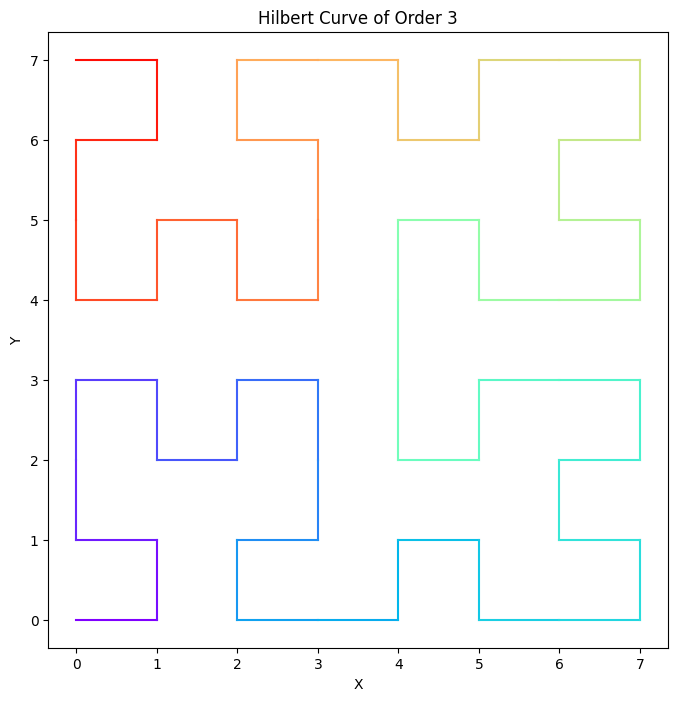

In [4]:
def plot_hilbert_curve(order):
    """
    根据指定阶数的Hilbert曲线的pth文件绘制路径并输出图片。
    
    参数:
        order (int): 曲线的阶数。
    """
    # 加载Hilbert曲线的张量
    curve_tensor = torch.load(f'../../data/hilbert/curve_template_3d_rank_{order}.pth').cpu()
    # curve_tensor = rotate90(curve_tensor, order)
    dim = 2 ** order
    # 提取坐标
    coords = np.array([[x, y] for x in range(dim) for y in range(dim)])
    x = coords[:, 0]
    y = coords[:, 1]
    flat_coords = y * dim + x
    hil_inds = curve_tensor[flat_coords].long()
    inds_curt_to_next = torch.argsort(hil_inds)
    x_coords = x[inds_curt_to_next]
    y_coords = y[inds_curt_to_next]
    
    # 生成颜色映射
    colors = plt.cm.rainbow(np.linspace(0, 1, len(x_coords)))
    
    # 绘制Hilbert曲线
    plt.figure(figsize=(8, 8))
    for i in range(len(x_coords) - 1):
        plt.plot(x_coords[i:i+2], y_coords[i:i+2], color=colors[i])
    # plt.plot(x_coords, y_coords, marker='o')
    plt.title(f'Hilbert Curve of Order {order}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(False)
    # 设置刻度步长为1
    plt.xticks(range(min(x_coords), max(x_coords) + 1, 1))
    plt.yticks(range(min(y_coords), max(y_coords) + 1, 1))
    
    plt.show()
    
plot_hilbert_curve(3)

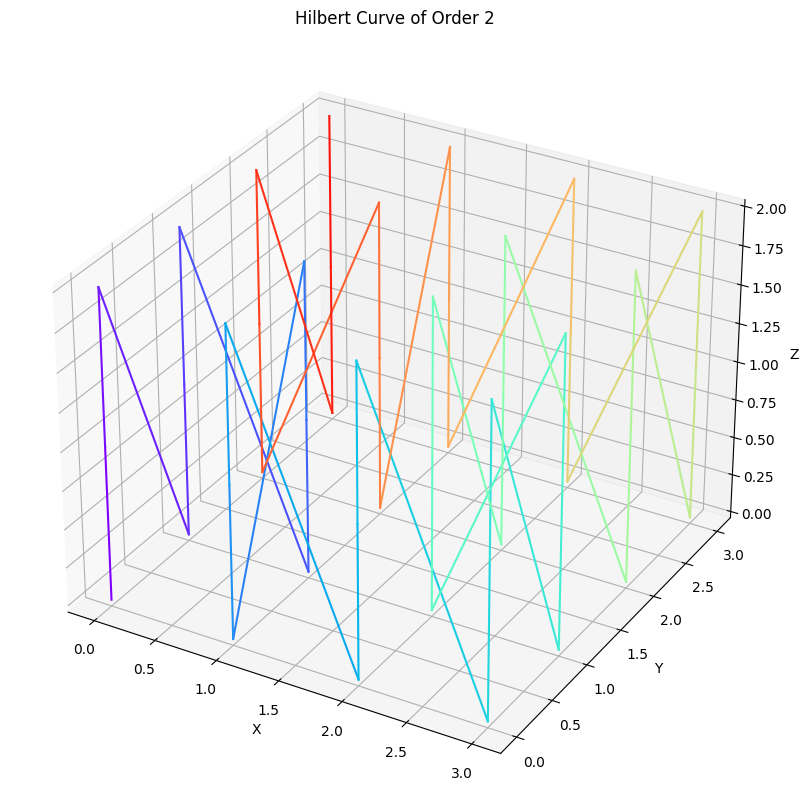

: 

In [ ]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_hilbert_curve_3d(order, z_dim = 3):
    """
    根据指定阶数的Hilbert曲线的pth文件绘制三维路径并输出图片。
    
    参数:
        order (int): 曲线的阶数。
    """
    # 加载Hilbert曲线的张量
    curve_tensor = torch.load(f'../../data/hilbert/curve_template_3d_rank_{order}.pth').cpu()
    # curve_tensor = rotate90(curve_tensor, order)
    dim = 2 ** order
    # 提取坐标
    coords = np.array([[x, y, z] for x in range(dim) for y in range(dim) for z in range(z_dim)])
    x = coords[:, 0]
    y = coords[:, 1]
    z = coords[:, 2]
    flat_coords = y * dim + x
    hil_inds = (curve_tensor[flat_coords] * z_dim + z).long()
    inds_curt_to_next = torch.argsort(hil_inds)
    x_coords = x[inds_curt_to_next]
    y_coords = y[inds_curt_to_next]
    z_coords = z[inds_curt_to_next]

    # 生成颜色映射
    colors = plt.cm.rainbow(np.linspace(0, 1, len(x_coords)))

    # 绘制三维Hilbert曲线
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(x_coords) - 1):
        ax.plot(x_coords[i:i+2], y_coords[i:i+2], z_coords[i:i+2], color=colors[i])
    ax.set_title(f'Hilbert Curve of Order {order}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

plot_hilbert_curve_3d(2)